In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.cm import get_cmap
import seaborn as sns
import string
import pickle # save data frame (results) in a .pkl file
import pandas as pd
from datetime import datetime
import os, sys
import re

import grakel as gk


sys.path.insert(0, 'C:/Users/ragna/Documents/Ragnar/Code/MMDGraph')
#from importlib import reload
from mmdutils import readfoldertopanda, PlotROCGeneral, plotVaryingBGDEG, findAUC
#reload(readfoldertopanda)
import importlib
importlib.reload(sys.modules['mmdutils'])
from mmdutils import readfoldertopanda, PlotROCGeneral, plotVaryingBGDEG, findAUC
import MMDforGraphs as mg
importlib.reload(sys.modules['MMDforGraphs'])
from importlib import reload  
foo = reload(mg)


Generate two samples:
One sample has 40 binomial graphs with average degree 4 and 40 nodes, labels labelled randomly with the letter a or b.
One sample has 40 binomial graphs with average degree 5 and 40 nodes, labels labelled randomly with the letter a or b.


In [16]:
n_1 = 40
n_2 = 40
nnode_1 = 40
nnode_2 = 50

# bg1 = mg.BinomialGraphs(n_1, nnode_1, k = 4, l = 'rnglabels', fullyConnected = True, nr_letters = 2)
# bg2 = mg.BinomialGraphs(n_2, nnode_2, k = 4, l = 'rnglabels', fullyConnected = True, nr_letters = 2)

bg1 = mg.BinomialGraphs(n_1, nnode_1, k = 4, l = 'degreelabels')
bg2 = mg.BinomialGraphs(n_2, nnode_2, k = 4, l = 'degreelabels')

{'MMD_b': 0.456, 'MMD_u': 0.468}


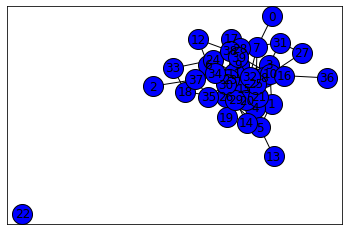

In [21]:

bg1.Generate()
bg2.Generate()
Gs = bg1.Gs + bg2.Gs
nx.draw_networkx(Gs[1], node_color='blue', edgecolors='black', node_size=400)

# kernel = [{"name": "multiscale_laplacian"}]
# K = mg.KernelMatrix(graph_list, kernel, False)
graph_list = gk.graph_from_networkx(Gs, node_labels_tag='label')    
kernel = [{"name": "weisfeiler_lehman", "n_iter": 2}, {"name": "vertex_histogram"}]
# kernel = [{"name": "lovasz_theta", "n_samples":20}]
# kernel = [{"name": "core_framework", "min_core": 1}, {"name":"propagation", 't_max':5, 'w':0.1, 'M':"H"}]
# kernel = [{"name": "pyramid_match", "with_labels":True, "d":2, "L":10}] 
# kernel = [{"name":'odd_sth', 'h':2}]
# kernel = [{"name": "propagation", "t_max": 4, "w":0.1, "M":'TV'}]
init_kernel = gk.GraphKernel(kernel= kernel, normalize=True, n_jobs= 4)
K = init_kernel.fit_transform(graph_list)

# print(np.all(K == 0)) 
# print(K)



MMD_functions = [mg.MMD_b, mg.MMD_u]

# initialize bootstrap class, we only want this to be initalized once so that numba njit
# only gets compiled once (at first call)
kernel_hypothesis = mg.BoostrapMethods(MMD_functions)
function_arguments=[dict(n = bg1.n, m = bg2.n ), dict(n = bg1.n, m = bg2.n )]
kernel_hypothesis.Bootstrap(K, function_arguments, B = 1000, method = "BootstrapScheme")
print(kernel_hypothesis.p_values)

In [4]:
import seaborn as sns

Text(0.5, 1.0, 'k= 4 n = 40 ; l = 4 n = 50')

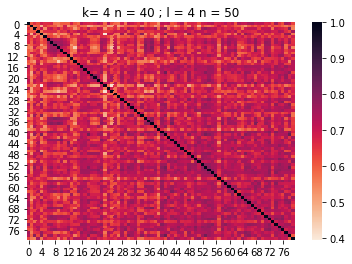

In [22]:
# K[range(K.shape[0]), range(K.shape[0])] = 800
sns.heatmap(K, cmap='rocket_r')#, center=K[1,5])#, vmin = 800, vmax = 950)
plt.title('k= 4 n = 40 ; l = 4 n = 50')

In [4]:
np.array((range(10)))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
np.random.choice(10, size = 10)

array([5, 2, 6, 3, 5, 2, 3, 0, 3, 9])